In [73]:
import pandas as pd
import numpy as np

raw_data = pd.read_excel(r'C:\Users\1\Documents\ROBMS\BMS\BMS_UA\3M_2016_goods.xlsx', encoding = 'utf8')

In [74]:
#names = ['name','bvdep','nace', 'city','revenue_2015','revenue_2014','revenue_2013','pnl_2015', 'pnl_2014','pnl_2013', 'bs_2015', 'bs_2014', 'bs_2013']
fin_data = raw_data.loc[:,['Название компании', 'Номер BvD','Оснвоной код NACE Rev. 2.','Город','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2015','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2014','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2013','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2015','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2014','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2013','Баланс\nтыс UAH\n(Rate at last closing date)\n2015','Баланс\nтыс UAH\n(Rate at last closing date)\n2014','Баланс\nтыс UAH\n(Rate at last closing date)\n2013']]
#fin_data = fin_data.rename(index = str, columns = {'Название компании':'name'})
fin_data = fin_data.rename(index = str, columns = {'Название компании':'name','Номер BvD':'bvdep', 'Оснвоной код NACE Rev. 2.':'nace', 'Город':'city','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2015':'revenue_2015','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2014':'revenue_2014', 'Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2013':'revenue_2013', 'Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2015':'pnl_2015','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2014':'pnl_2014','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2013':'pnl_2013','Баланс\nтыс UAH\n(Rate at last closing date)\n2015':'bs_2015','Баланс\nтыс UAH\n(Rate at last closing date)\n2014':'bs_2014','Баланс\nтыс UAH\n(Rate at last closing date)\n2013':'bs_2013'})
#fin_data['Название компании'] = fin_data['Название компании'].reindex('name')
print(fin_data.head(3))

                name       bvdep    nace                      city  \
1      ВЕНТА ЛТД ТОВ  UA21947206  4646.0  Дніпро (Дніпропетровськ)   
2  СКЕЛА ТЕРЦИУМ ТОВ  UA35247177  4690.0                      Киев   
3          СТАЛЬ ТОВ  UA35394737  4690.0                    Дніпро   

  revenue_2015 revenue_2014 revenue_2013 pnl_2015 pnl_2014 pnl_2013  bs_2015  \
1      6656653      5295348      3274271   447984   133784    54194  2101985   
2      3658385       495869            0     2415     8793        0   836033   
3      2761428      2148031      1843405    84163   122049    69217  1398548   

   bs_2014  bs_2013  
1  1940658  1159760  
2   439163   116650  
3  1100957  1053023  


In [75]:
import re

def drop_missing_data(x):
    empty_list = []
    if re.findall(r'n.a.', str(x)) == empty_list:
        return str(x)
    else:
        return np.nan

fin_names = list(fin_data.columns)[4:]
for col_name in fin_names:
    fin_data[col_name] = fin_data[col_name].apply(lambda x: drop_missing_data(x))
    fin_data = fin_data[fin_data[col_name]!='0']
fin_data = fin_data.dropna()
#print(fin_data)

In [76]:
years = ['2015', '2014','2013']
for year in years:
    fin_data['pnl_'+year] = fin_data['pnl_'+year].apply(lambda x: float(x))
    fin_data['revenue_'+year] = fin_data['revenue_'+year].apply(lambda x: float(x))
    fin_data['bs_'+year] = fin_data['bs_'+year].apply(lambda x: float(x))        

fin_data['rev_ave'] = (fin_data['revenue_2015']+fin_data['revenue_2014']+fin_data['revenue_2013'])/3
fin_data['pnl_ave'] = (fin_data['pnl_2015']+fin_data['pnl_2014']+fin_data['pnl_2013'])/3
fin_data['bs_ave'] = (fin_data['bs_2015']+fin_data['bs_2014']+fin_data['bs_2013'])/3

print(fin_data.head(5))

                name       bvdep    nace                      city  \
1      ВЕНТА ЛТД ТОВ  UA21947206  4646.0  Дніпро (Дніпропетровськ)   
3          СТАЛЬ ТОВ  UA35394737  4690.0                    Дніпро   
4    ФАРМПЛАНЕТА ТОВ  UA36852896  4646.0                      Мила   
5  ТЕХНОТОРГ ДОН ТОВ  UA31764816  4690.0                  Миколаїв   
6  РОНА КОМПАНIЯ ТОВ  UA31789757  4690.0          Івано-Франківськ   

   revenue_2015  revenue_2014  revenue_2013  pnl_2015  pnl_2014  pnl_2013  \
1     6656653.0     5295348.0     3274271.0  447984.0  133784.0   54194.0   
3     2761428.0     2148031.0     1843405.0   84163.0  122049.0   69217.0   
4     2472890.0     1274936.0      526223.0    4149.0  -34297.0    3438.0   
5     2245530.0     1163763.0     1234204.0   75573.0   75479.0   36308.0   
6     1819023.0     1310167.0      937345.0  134354.0   53798.0   53532.0   

     bs_2015    bs_2014    bs_2013       rev_ave        pnl_ave        bs_ave  
1  2101985.0  1940658.0  1159760.0  

In [77]:
fin_data['quantity'] = 1
fin_data['rev_ave_2'] = fin_data['rev_ave'].apply(lambda x: np.around(x, decimals = -3))
fin_data['opm'] = fin_data['pnl_ave']/fin_data['rev_ave']*100
fin_data['opm'] = fin_data['opm'].apply(lambda x: np.around(x, decimals = 2))

#print(fin_data.head(5))    
print(fin_data.describe())

               nace  revenue_2015  revenue_2014  revenue_2013      pnl_2015  \
count  14070.000000  1.407000e+04  1.407000e+04  1.407000e+04  1.407000e+04   
mean    4681.731414  1.331391e+04  1.089399e+04  9.768655e+03 -2.336190e+02   
std       13.401550  8.699585e+04  7.280058e+04  5.593601e+04  1.828959e+04   
min     4646.000000 -4.800000e+01 -4.489000e+02 -7.570000e+01 -1.023110e+06   
25%     4673.000000  3.306250e+02  3.362250e+02  3.735250e+02  2.000000e-01   
50%     4690.000000  1.583500e+03  1.394850e+03  1.444950e+03  3.810000e+01   
75%     4690.000000  6.709425e+03  5.374475e+03  5.231900e+03  2.946750e+02   
max     4690.000000  6.656653e+06  5.295348e+06  3.274271e+06  5.525269e+05   

            pnl_2014       pnl_2013       bs_2015       bs_2014       bs_2013  \
count   14070.000000   14070.000000  1.407000e+04  1.407000e+04  1.407000e+04   
mean     -725.389524      91.572878  1.093520e+04  9.559949e+03  8.320619e+03   
std     18823.880510    5934.061666  7.203439

Analysis of operating profit margin dependecies from company's revenue.

companies with average operating margin less than -20.0 were descluded

In [78]:
fd = fin_data.loc[:,['rev_ave_2','rev_ave', 'pnl_ave','opm','quantity']]
fd['rev_ave_2'] = fd['rev_ave_2']/1000
fd = fd[fd['rev_ave']>0]
fd = fd[fd['opm']>-20.0]

wm = lambda x: np.average(x, weights=fd.loc[x.index,'rev_ave'])
f = {'quantity': ['sum'], 'opm': {'weighted_mean' : wm} }
fd = fd.groupby(['rev_ave_2'], as_index = False).agg(f)
#.sum()

print(fd.describe())
print(fd.head(5))

         rev_ave_2           opm     quantity
                   weighted_mean          sum
count   251.000000    251.000000   251.000000
mean    242.597610      3.570872    50.968127
std     424.768955      6.025820   279.723876
min       0.000000    -18.940000     1.000000
25%      62.500000      1.085286     1.000000
50%     129.000000      3.031533     2.000000
75%     241.000000      4.834014     7.500000
max    5075.000000     48.030000  2926.000000
  rev_ave_2           opm quantity
            weighted_mean      sum
0       0.0     20.363344     2926
1       1.0      5.180897     2742
2       2.0      4.735871     1443
3       3.0      5.122676      922
4       4.0      5.275918      650


C:\Users\1\Anaconda3\lib\site-packages\pandas\core\groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


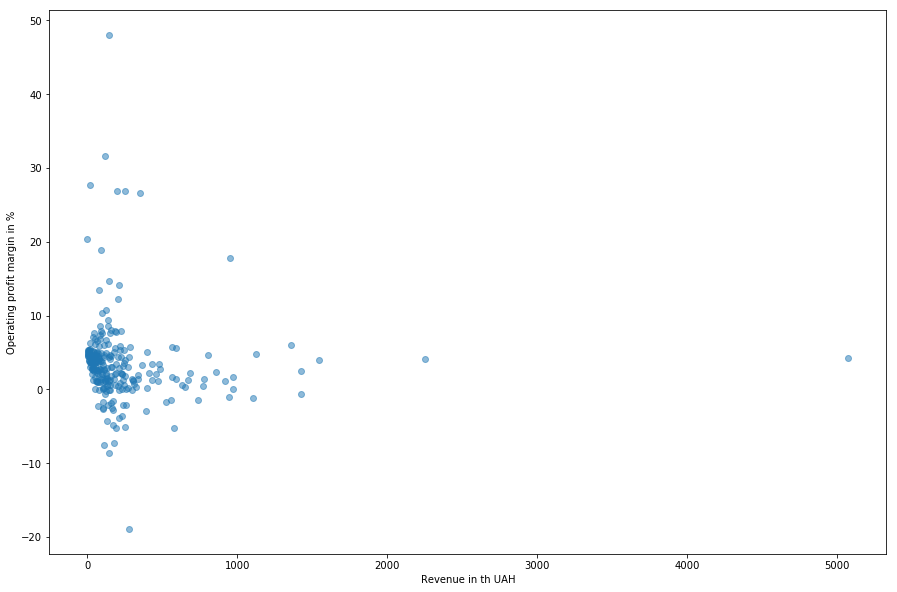

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.scatter(fd['rev_ave_2'], fd['opm'], alpha=0.5)
plt.xlabel('Revenue in th UAH')
plt.ylabel('Operating profit margin in %')
plt.show()

In [81]:
#descluded critial figures
#fd = fd[fd['rev_ave_2']>1.0]
fd = fd[fd['rev_ave_2']<1000.0]
#fd = fd[fd['opm']>-5.0]
#fd = fd[fd['opm']<15.0]
print(fd.describe())

        rev_ave_2           opm     quantity
                  weighted_mean          sum
count  243.000000    243.000000   243.000000
mean   187.567901      3.591436    52.613169
std    200.398112      6.107719   284.159844
min      0.000000    -18.940000     1.000000
25%     60.500000      1.085286     1.000000
50%    124.000000      3.007460     2.000000
75%    228.500000      4.870581     8.500000
max    974.000000     48.030000  2926.000000


In [82]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

rev_train = fd.loc[:,['rev_ave_2']]
opm_train = fd.loc[:,['opm']]
rev_test = fd.loc[:,['rev_ave_2']]

lr.fit(rev_train, opm_train)
pred = lr.predict(rev_test)
#print(pred)

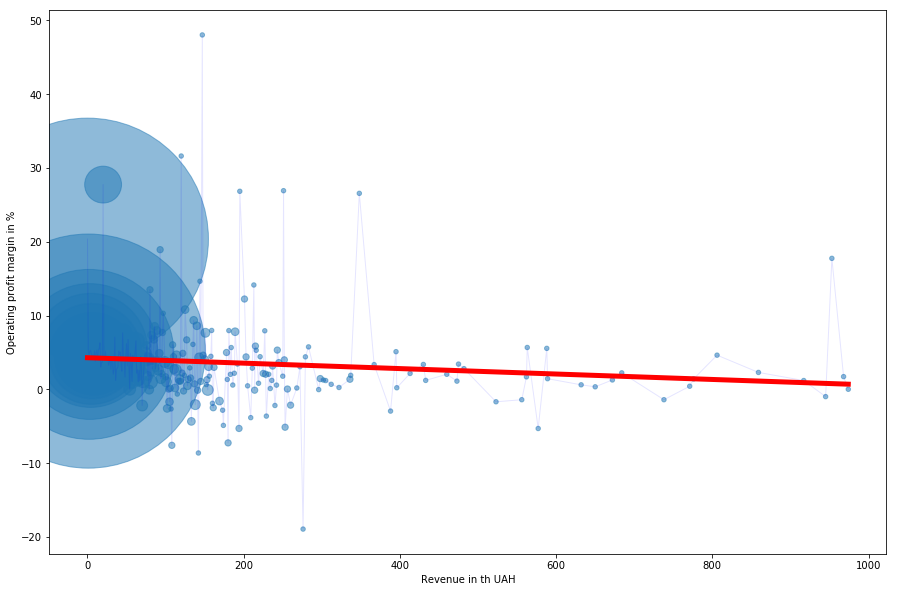

In [83]:
plt.figure(figsize=(15,10))
plt.scatter(fd['rev_ave_2'], fd['opm'], s=fd['quantity']*20, alpha=0.5)
plt.plot(fd['rev_ave_2'], fd['opm'], color='blue', linewidth=1, alpha = 0.1)
plt.plot(rev_test, pred, color='red', linewidth=5)
plt.xlabel('Revenue in th UAH')
plt.ylabel('Operating profit margin in %')
plt.show()

Analysis of margin dependencies from city

In [89]:
fd_city = fin_data.loc[:,['city','opm','quantity']]

def rename_city(df):
    df.city[df['city']=='Дніпро (Дніпропетровськ)']='Дніпро'
    df.city[df['city']=='Дніпропетровськ']='Дніпро'
    df.city[df['city']=='Камьянське (Дніпродзержинськ)'] = 'Камьянське'
    df.city[df['city']=='Дніпродзержинськ'] = 'Камьянське'
    df.city[df['city']=='Кропивницький (Кіровоград)'] = 'Кропивницький'
    df.city[df['city']=='Кіровоград'] = 'Кропивницький'
    
    return df

fd_city = rename_city(fd_city)
fd_city = fd_city[fd_city['opm']>-20.0]
fd_city = fd_city[fd_city['opm']<100.0]
print(fd_city.describe())

C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

                opm  quantity
count  12749.000000   12749.0
mean       4.873403       1.0
std       11.518688       0.0
min      -19.960000       1.0
25%        0.270000       1.0
50%        2.940000       1.0
75%        6.970000       1.0
max       99.950000       1.0


C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [90]:
fd_city['city'] = fd_city['city'].apply(lambda x: x.lower())
fd_city = fd_city.groupby(['city'], as_index = False).agg({'quantity' : np.sum,'opm' : np.median})
print(fd_city.describe())
print(fd_city.head(3))

              opm     quantity
count  856.000000   856.000000
mean     6.083972    14.893692
std     11.895154   140.798547
min    -19.750000     1.000000
25%      1.127500     1.000000
50%      3.770000     1.000000
75%      7.781250     2.000000
max     99.400000  3618.000000
               city   opm  quantity
0  iвано-франківськ  2.37         4
1           iзяслав  0.62         1
2           iллінці  4.43         1


In [91]:
fd_city.city[fd_city['quantity']<15]='other'
fd_city = fd_city.groupby(['city'], as_index = False).agg({'quantity' : np.sum,'opm' : np.median})
fd_city = fd_city.sort_values(by = 'quantity', ascending = True)
fd_city['city_id'] = np.arange(1,len(fd_city.index)+1)
fd_city.city_id[fd_city['city'] == 'other'] = 0 
print(fd_city.describe())
print(fd_city.tail(5))

             opm     quantity    city_id
count  53.000000    53.000000  53.000000
mean    3.038113   240.547170  26.018868
std     1.111412   570.047116  15.476397
min     0.880000    15.000000   0.000000
25%     2.250000    22.000000  13.000000
50%     2.990000    65.000000  26.000000
75%     3.865000   168.000000  39.000000
max     6.100000  3618.000000  53.000000
      city    opm  quantity  city_id
26   львів  4.010       537       49
43  харків  2.920      1160       50
9   дніпро  3.865      1238       51
0    other  4.035      1683        0
16    киев  2.300      3618       53


C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\1\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [92]:
annotations = fd_city['city'].values
x = fd_city['city_id'].values
y = fd_city['opm'].values

print(annotations)
#print(x, y)

['коростень' 'боярка' 'мелітополь' 'іллічівськ' 'васильків' 'дружківка'
 'конотоп' 'слобожанське (ювілейне)' 'мукачеве' 'дрогобич' 'червоноград'
 'вишгород' 'сєверодонецьк' 'бориспіль' 'шостка' 'луганськ' 'павлоград'
 'словьянськ' 'новомосковськ' 'нікополь' 'вишневе' 'костянтинівка'
 'кропивницький' 'камьянське' 'бровари' 'біла церква' 'тернопіль'
 'краматорськ' 'ужгород' 'кременчук' 'маріуполь' 'чернівці' 'хмельницький'
 'чернігів' 'луцьк' 'рівне' 'івано-франківськ' 'черкаси' 'житомир'
 'вінниця' 'полтава' 'миколаїв' 'донецьк' 'херсон' 'кривий ріг' 'суми'
 'запоріжжя' 'одеса' 'львів' 'харків' 'дніпро' 'other' 'киев']


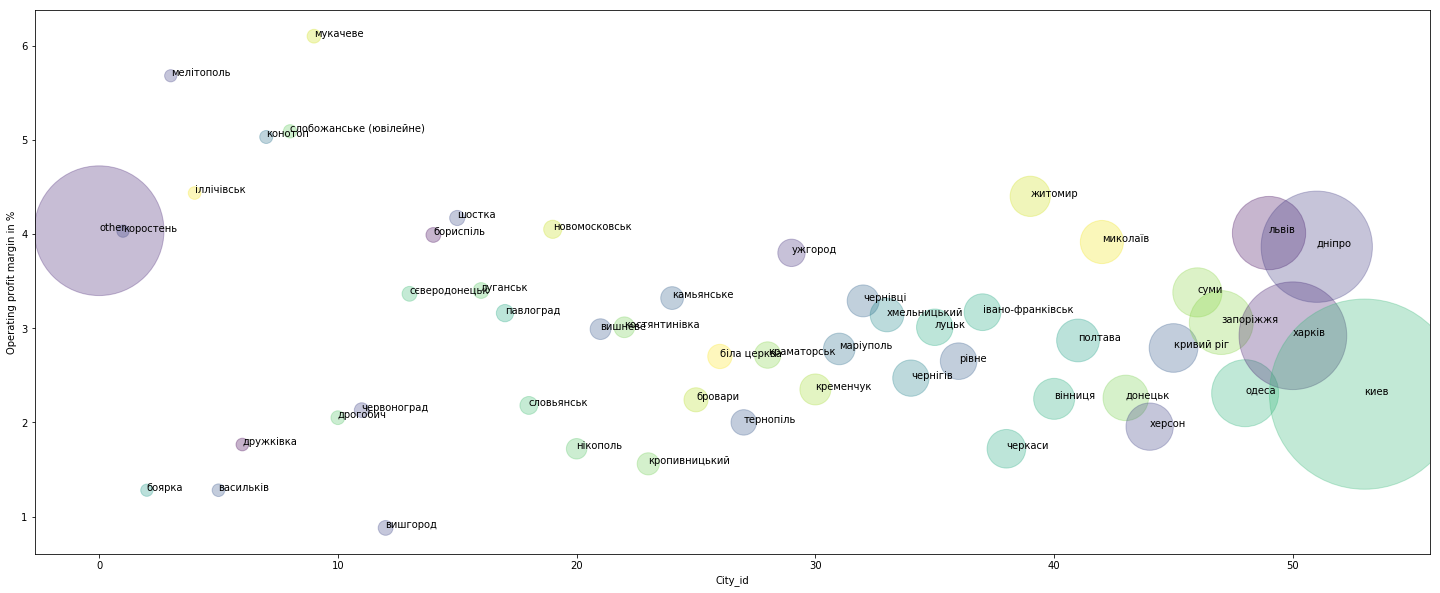

In [93]:
plt.figure(figsize=(25,10))
colors = np.random.rand(len(fd_city.index))
plt.scatter(fd_city['city_id'], fd_city['opm'], s=fd_city['quantity']*10, c=colors, alpha=0.3)
#plt.bar(fd_city['city_id'], fd_city['opm'])
plt.xlabel('City_id')
plt.ylabel('Operating profit margin in %')
for i in range(len(annotations)):
    plt.annotate(annotations[i], (x[i], y[i]))
#plt.annotate(xy = (fd_city['city_id'], fd_city['opm']), s = fd_city['city'])
#plt.legend(handles=[list(fd_city['city'].values())], loc=1)
plt.show()

In [104]:
#fin_data_2.adress = fin_data_2.adress.apply(lambda x: x.lower())
print(fin_data_2.adress.describe())
print()
print(fin_data_2.adress)

count                                            19137
unique                                           17407
top       вул. Мельникова, буд. 12, Шевченківський р-н
freq                                                40
Name: adress, dtype: object
1                            м.дніпро, узвіз селянський, 3
2              вул. Сергія Струтинського, 13-15, оф. 509/1
3           вул. Героїв Сталінграду, 122, корп. е-5, оф. 4
4        вул. Комарова 23 Л, Києво-Святошинський р-н, К...
5                        просп. Героїв Сталінграду 113 / 1
6                             вул. Грушевського 22, пов. 5
7        ВУЛ.СОПОНЕЦЬКА, ЗАКАРПАТСЬКА ОБЛ., ТЯЧIВСЬКИЙ ...
8                                    вул. Дегтярівська, 48
9        Новоград-Волинський р-н, Житомирська обл., вул...
10              вул. Межигірська, буд. 82, Подільський р-н
11       вул. Маршала Малиновського, буд. 12-А, Оболонс...
12                                  вул. Катерининська, 46
13       вул. Червоноармійська, буд. 9/2, оф

In [100]:
fin_data_2 = raw_data.loc[:,['Название компании','Город', 'Адрес','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2015','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2014','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2013','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2015','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2014','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2013']]
fin_data_2 = fin_data_2.rename(index = str, columns = {'Название компании':'name', 'Город':'city','Адрес':'adress','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2015':'revenue_2015','Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2014':'revenue_2014', 'Чиста виручка від реалізації продукції (товарів, робіт, послуг)\nтыс UAH\n(Rate at last closing date)\n2013':'revenue_2013', 'Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2015':'pnl_2015','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2014':'pnl_2014','Фінансові результати від операційної діяльності прибуток (збиток)\nтыс UAH\n(Rate at last closing date)\n2013':'pnl_2013'})

print(fin_data_2.head(3))

                name                      city  \
1      ВЕНТА ЛТД ТОВ  Дніпро (Дніпропетровськ)   
2  СКЕЛА ТЕРЦИУМ ТОВ                      Киев   
3          СТАЛЬ ТОВ                    Дніпро   

                                           adress revenue_2015 revenue_2014  \
1                   м.дніпро, узвіз селянський, 3      6656653      5295348   
2     вул. Сергія Струтинського, 13-15, оф. 509/1      3658385       495869   
3  вул. Героїв Сталінграду, 122, корп. е-5, оф. 4      2761428      2148031   

  revenue_2013 pnl_2015 pnl_2014 pnl_2013  
1      3274271   447984   133784    54194  
2            0     2415     8793        0  
3      1843405    84163   122049    69217  


In [ ]:
#def get_region(x):
    
fd_reg = rename_city(fin_data_2)